# Questions to Explore: 


Are popular products better than less popular ones (based on customer reviews)?<br><br>
What are the salient words and phrases used in the reviews of popular products?<br><br>
Do customer opinions change from early to late reviews?<br><br>
After the product is launched, what is the trend of positive and negative reviews over time? <br><br>

In [40]:
# I didn't put any google trends data here since we are only exploring amazon reviews in this notebook.
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
    
    
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline


def GetMergedAmazonDataFrames():
    files_to_use = [r'data\AirPods Pro.csv', r'data\Elite 75t.csv',r'data\Free.csv',
                   r'data\Galaxy Buds Plus.csv',r'data\M-200.csv',r'data\NC700.csv',
                   r'data\Soundcore Liberty 2 Pro.csv',r'data\Soundcore Liberty Air 2.csv',r'data\Soundcore Life Q20.csv',
                   r'data\WF-1000XM3.csv']
    amzn_df = pd.read_csv(files_to_use[0],  parse_dates=False)
    for file in files_to_use[1:]:
        df = pd.read_csv(file,  parse_dates=False)
#         amzn_df = pd.merge(amzn_df, df, how='outer',on='review_date')
        amzn_df = pd.concat([amzn_df,df],sort=False)
        
    amzn_df['review_date'] = pd.to_datetime(amzn_df['review_date'], format='%Y-%m-%d')
    amzn_df = amzn_df[['Manufacturer', 'ProductName', 'review_rating', 'verified_purchase',
       'review_date', 'review_title', 'review_text']]
    return amzn_df
    

# weather_df['review_date'] = pd.to_datetime(weather_df['review_date'], format='%Y-%m-%d')
# googleTrends_df
amzn_df = GetMergedAmazonDataFrames()
print(amzn_df.columns)
print(amzn_df['ProductName'].unique())
amzn_df.head()

Index(['Manufacturer', 'ProductName', 'review_rating', 'verified_purchase',
       'review_date', 'review_title', 'review_text'],
      dtype='object')
['AirPods Pro' 'Elite 75t' 'Free' 'Galaxy Buds Plus' 'M-200' 'NC700'
 'Soundcore Liberty 2 Pro' 'Soundcore Liberty Air 2' 'Soundcore Life Q20'
 'WF-1000XM3']


,Manufacturer,ProductName,review_rating,verified_purchase,review_date,review_title,review_text
0,Apple,AirPods Pro,5,0,2019-10-30,Airpods Pro deliver😎,This airpods pro do exactly what apple said th...
1,Apple,AirPods Pro,4,0,2019-10-30,List of Features/Changes compared to Airpods (v2),"Like iphone 11 Pro, Macbook Pro, Airpad Pro; t..."
2,Apple,AirPods Pro,3,0,2019-10-30,Cool but expensive,First review yeh heard about these excited but...
3,Apple,AirPods Pro,5,0,2019-10-30,Lit,They fire
4,Apple,AirPods Pro,5,1,2019-10-31,Saved my marriage,"With the new transparency mode, I can listen t..."


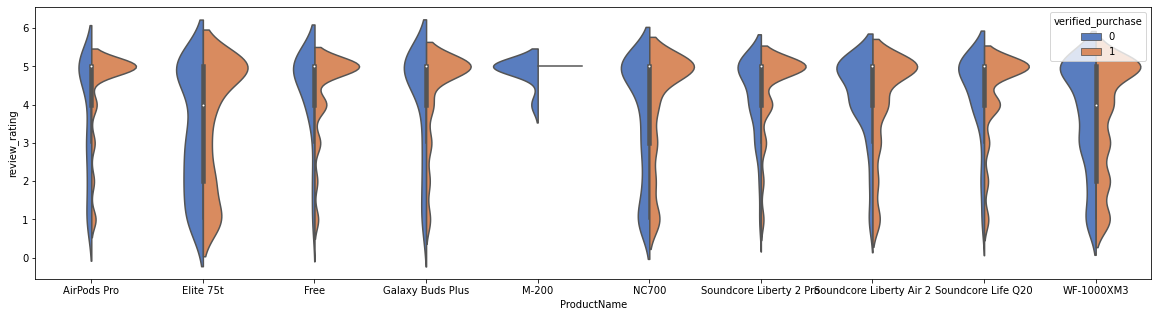

In [11]:

# Index(['Manufacturer', 'ProductName', 'review_rating', 'verified_purchase',
#        'review_date', 'review_title', 'review_text'],
#       dtype='object')

plt.figure(figsize=(20,5))
plt.title = 'Distribution of reviews between purchases and not purchased'
sns.violinplot(x="ProductName", y="review_rating", hue="verified_purchase",
                    data=amzn_df, palette="muted", split=True)


Notice in the above chart verified and not purchased reviews are heavily skewed towards 5 star ratings. It seems that most reviews are either going to be 5 or 1 stars, but this tendency doesn't exist for all items. Why do some items show a bimodal distributions and others dont?

[4. 3. 2.]


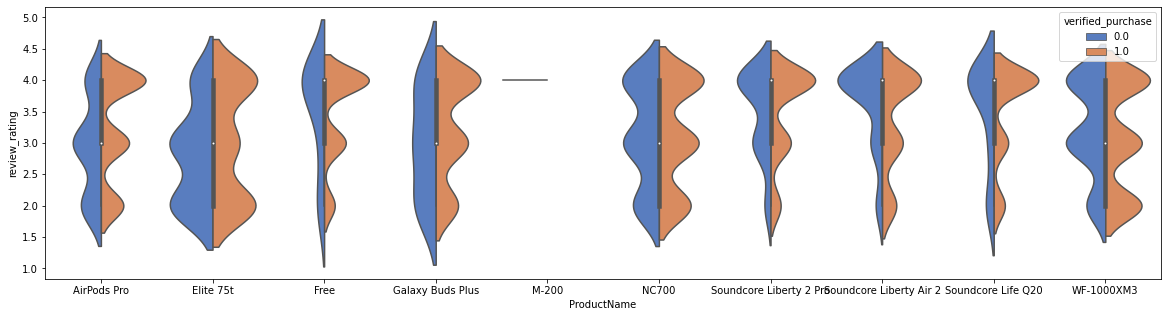

In [12]:
# Let's exclude the 5 and 1 star ratings and see what the violin plot looks like...

filtered_df  = amzn_df.where( (amzn_df['review_rating'] != 5) & (amzn_df['review_rating'] != 1)).dropna()
plt.figure(figsize=(20,5))
plt.title = 'Distribution of reviews between purchases and not purchased'
sns.violinplot(x="ProductName", y="review_rating", hue="verified_purchase",
                    data=filtered_df, palette="muted", split=True)

print(filtered_df['review_rating'].unique())

After removing the highest and lowest reviews we see a more evenly distributed set. Most products are evenly distributed... only a few products actually have a skewd distribution. Are the skewed distributions showing good products? To learn more I'll have to dive into the words used for the reviews.

['AirPods Pro' 'Elite 75t' 'Free' 'Galaxy Buds Plus' 'M-200' 'NC700'
 'Soundcore Liberty 2 Pro' 'Soundcore Liberty Air 2' 'Soundcore Life Q20'
 'WF-1000XM3']


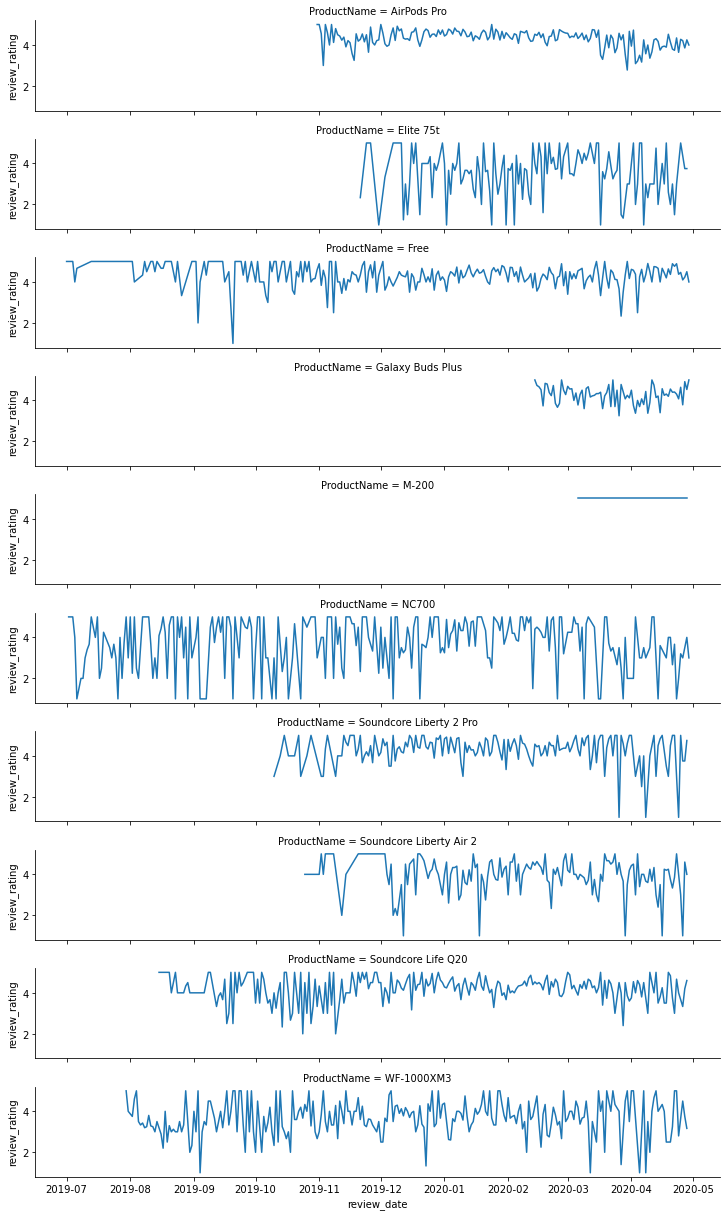

In [56]:
# ['Manufacturer', 'ProductName', 'review_rating', 'verified_purchase',
#        'review_date', 'review_title', 'review_text']
print(amzn_df['ProductName'].unique())

def FormatProductReviewRatingsAndDates(df, productName=None):
    if productName is not None:
        galaxyBuds_df = df.where(df['ProductName'].str.contains(productName)).dropna()
    else:
        galaxyBuds_df = df
    # Let's only look at verified purchases
    galaxyBuds_df = galaxyBuds_df.where(galaxyBuds_df['verified_purchase']== 1).dropna()
    galaxyBuds_df = galaxyBuds_df[['review_date', 'ProductName', 'review_rating']]
    galaxyBuds_df = galaxyBuds_df.groupby(['ProductName','review_date']).mean().reset_index()
#     galaxyBuds_df = galaxyBuds_df.set_index('review_date').resample('M').mean()
    return galaxyBuds_df

# average the reviews on time
# galaxyBuds_df = FormatProductReviewRatingsAndDates(amzn_df, 'Galaxy Buds Plus')

galaxyBuds_df = FormatProductReviewRatingsAndDates(amzn_df)

ordered_days = galaxyBuds_df.ProductName
g = sns.FacetGrid(galaxyBuds_df, row="ProductName", height=1.7, aspect=6,)
g.map(sns.lineplot, "review_date", "review_rating");



Most of the above charts don't appear to show any kind of trend... there are a few products that might have a difference, but most seem to be evenly balanced month to month...the averages don't seem to change much.